# Packages and Data Importing

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from scipy import sparse,stats
import xgboost as xgb
from sklearn import preprocessing, pipeline, metrics
import time

Data Importing

In [2]:
properties = pd.read_csv('data/properties_2016.csv')

C:\Users\Wanli\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train = pd.read_csv("data/train_2016_v2.csv")

In [4]:
# pd.read_csv(sio, dtype={"user_id": int, "username": object})

In [5]:
properties.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [6]:
train.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [7]:
print(properties.dtypes)

parcelid                          int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                   object
heatingorsystemtypeid           float64
latitude                        float64


In [8]:
print(train.dtypes)

parcelid             int64
logerror           float64
transactiondate     object
dtype: object


join train with properties

In [9]:
train_df = train.merge(properties, how='left', on='parcelid')

# EDA - Exploratory Data Analysis

## Logerror Histogram

Text(0.5,0,'logerror')

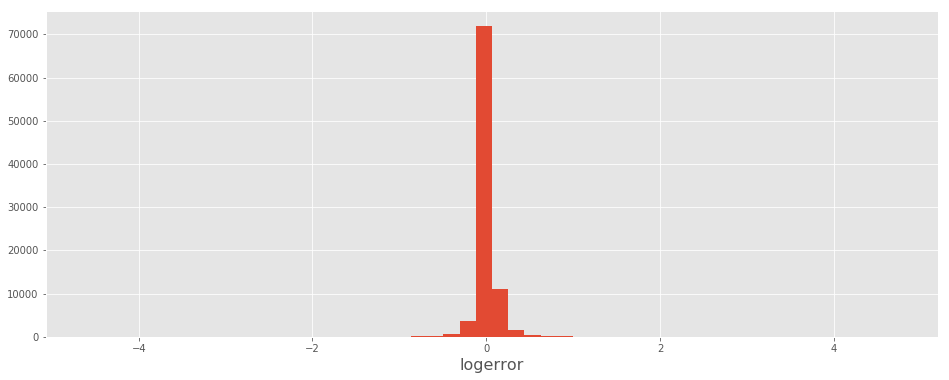

In [10]:
plt.figure(figsize = (16, 6))
plt.hist(train_df.logerror, bins = 50)
plt.xlabel('logerror', fontsize = 16)

display logerror histogram without outlier

Text(0.5,0,'logerror')

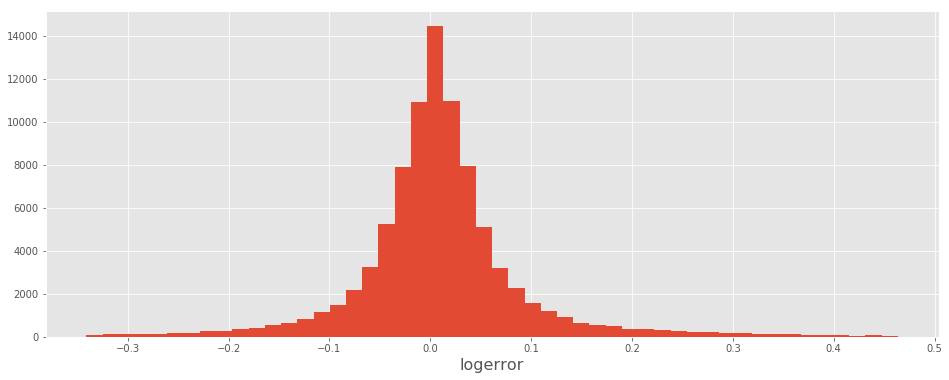

In [11]:
upperlimit = np.percentile(train_df.logerror, 99)
lowerlimit = np.percentile(train_df.logerror, 1)

plt.figure(figsize = (16, 6))
plt.hist(train_df.query('logerror < {} and logerror > {}'.format(upperlimit, lowerlimit)).logerror, bins = 50)
plt.xlabel('logerror', fontsize = 16)

## Key feature - taxvaluedollarcnt

Text(0.5,0,'taxvaluedollarcnt')

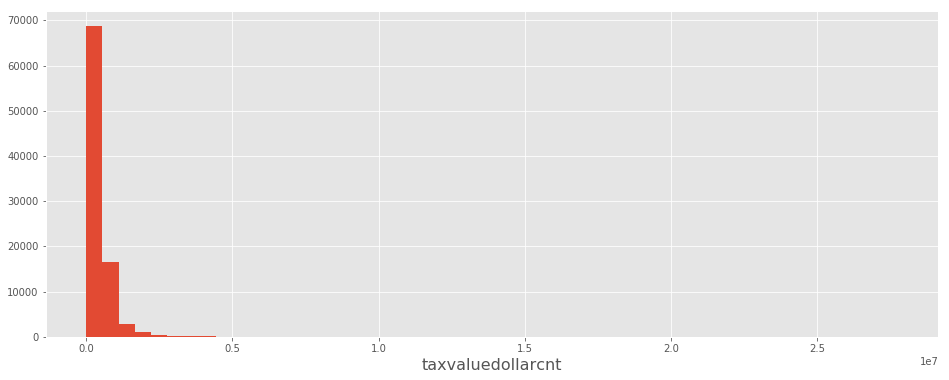

In [12]:
# when there is NaN in your column, use query to remove NaN for data display 
plt.figure(figsize = (16, 6))
plt.hist(train_df.query('taxvaluedollarcnt == taxvaluedollarcnt').taxvaluedollarcnt, bins = 50)
#plt.hist(train_df.taxvaluedollarcnt, bins = 50)
plt.xlabel('taxvaluedollarcnt', fontsize = 16)

Text(0.5,0,'taxvaluedollarcnt')

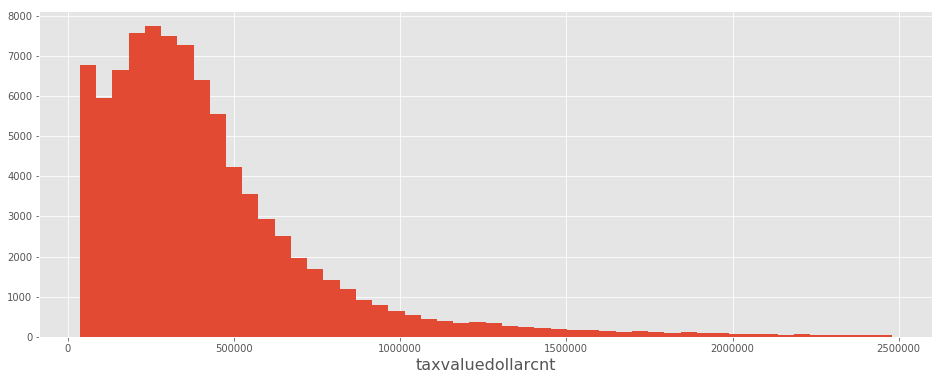

In [13]:
upperlimit = np.percentile(train_df.query('taxvaluedollarcnt == taxvaluedollarcnt').taxvaluedollarcnt.values, 99)
lowerlimit = np.percentile(train_df.query('taxvaluedollarcnt == taxvaluedollarcnt').taxvaluedollarcnt.values, 1)

plt.figure(figsize = (16, 6))
plt.hist(train_df.query('taxvaluedollarcnt < {} and taxvaluedollarcnt > {}'.format(upperlimit, lowerlimit)).taxvaluedollarcnt, bins = 50)
plt.xlabel('taxvaluedollarcnt', fontsize = 16)

## Key Feature - Lot size

Text(0.5,0,'lotsizesquarefeet')

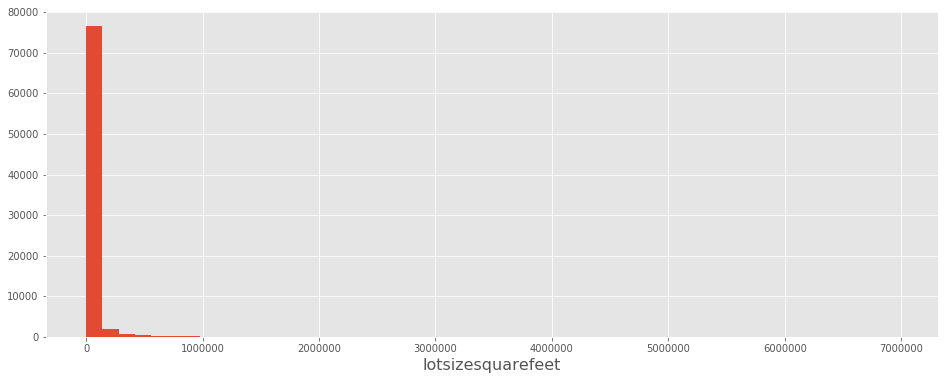

In [14]:
plt.figure(figsize = (16, 6))
plt.hist(train_df.query('lotsizesquarefeet == lotsizesquarefeet').lotsizesquarefeet, bins = 50)
plt.xlabel('lotsizesquarefeet', fontsize = 16)

Text(0.5,0,'lotsizesquarefeet')

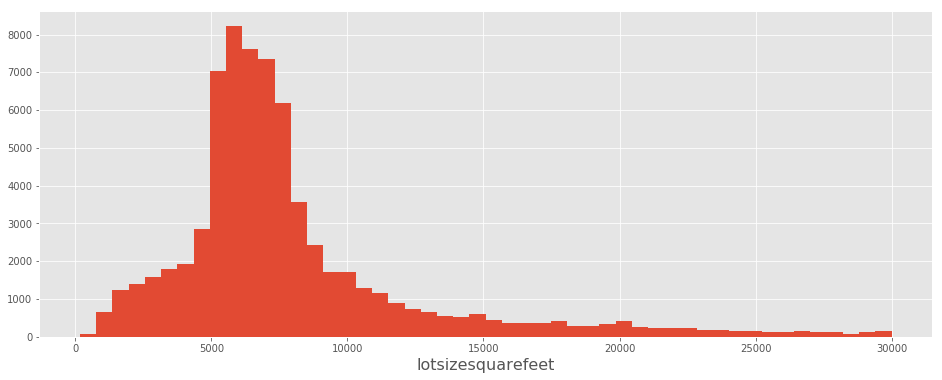

In [15]:
plt.figure(figsize = (16, 6))
plt.hist(train_df.query('lotsizesquarefeet > 0 and lotsizesquarefeet < 30000').lotsizesquarefeet, bins = 50)
plt.xlabel('lotsizesquarefeet', fontsize = 16)

## Key feature - built year

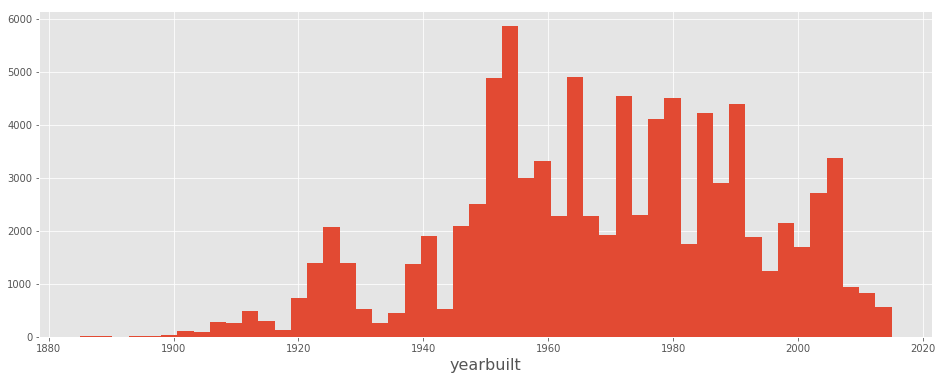

In [16]:
plt.figure(figsize = (16, 6))
plt.hist(train_df.query('yearbuilt == yearbuilt').yearbuilt, bins = 50)
plt.xlabel('yearbuilt', fontsize = 16)
plt.show()

## Multivariate EDA - logerror vs. tax value

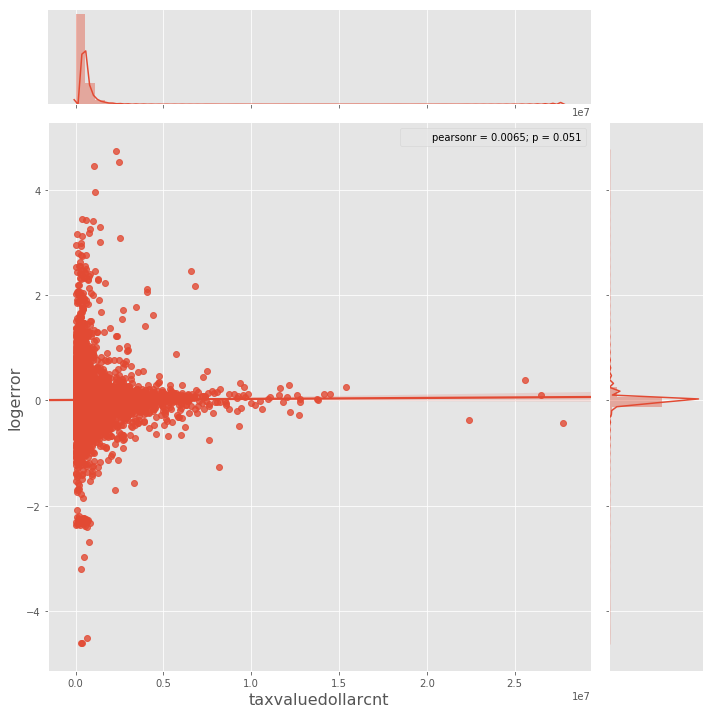

In [17]:
plt.figure(figsize = (16, 16))
sns.jointplot('taxvaluedollarcnt', 'logerror', train_df.query('taxvaluedollarcnt==taxvaluedollarcnt'), 
              size = 10, kind='reg', )
plt.xlabel('taxvaluedollarcnt', fontsize = 16)
plt.ylabel('logerror', fontsize = 16)
plt.show()

There is no clear relation between logerror and taxvaluedollarcnt

## add abs_logerror as the new feature

In [18]:
train_df['abs_logerror'] = train_df.logerror.abs()

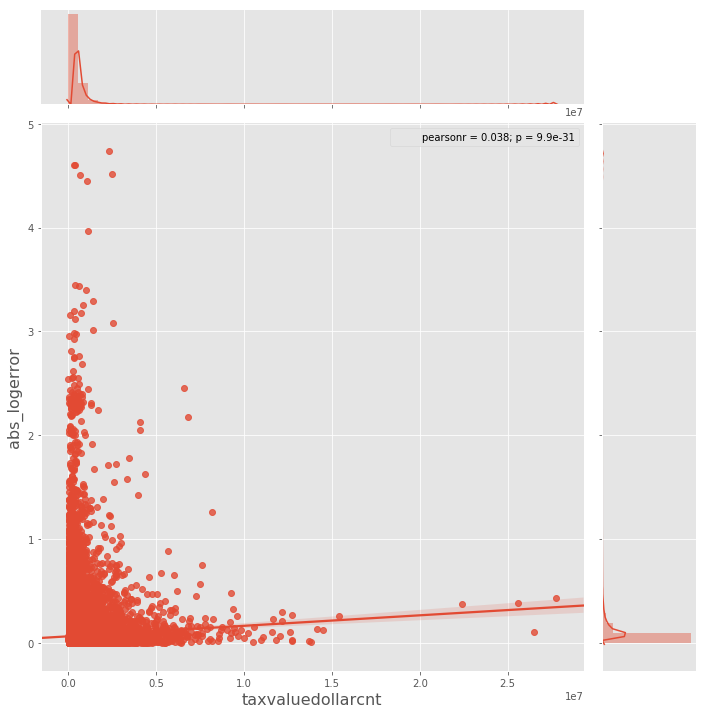

In [19]:
plt.figure(figsize = (16, 16))
sns.jointplot('taxvaluedollarcnt', 'abs_logerror', train_df.query('taxvaluedollarcnt == taxvaluedollarcnt'), 
              size = 10, kind = 'reg')
plt.xlabel('taxvaluedollarcnt', fontsize = 16)
plt.ylabel('abs_logerror', fontsize = 16)
plt.show()

for high value house, taxvaluedollarcnt could help a bit

matplotlib scatter plot with alpha 

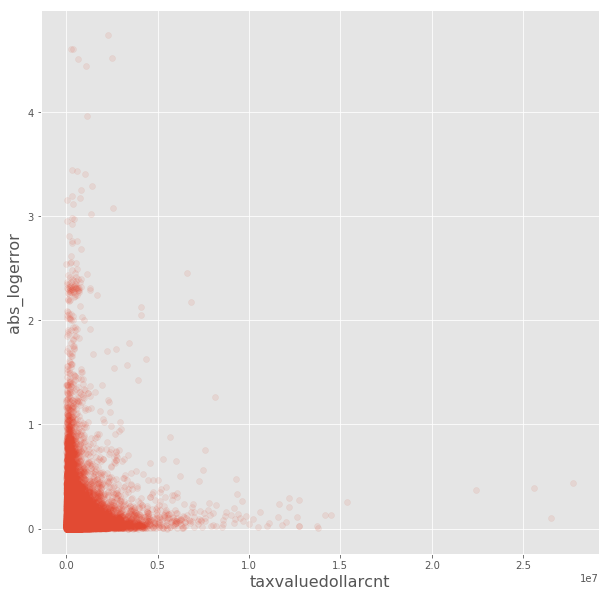

In [43]:
plt.figure(figsize = (10, 10))
plt.scatter(train_df.taxvaluedollarcnt, train_df.abs_logerror, alpha=0.1)
plt.xlabel('taxvaluedollarcnt', fontsize = 16)
plt.ylabel('abs_logerror', fontsize = 16)
plt.show()

zoom into detail

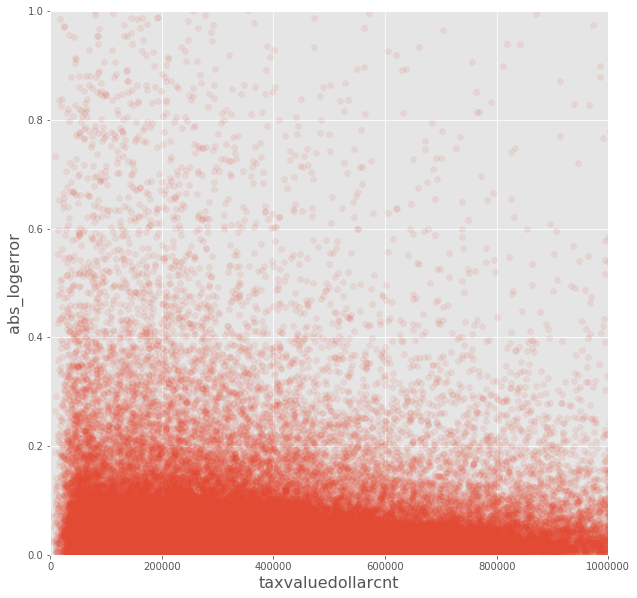

In [44]:
plt.figure(figsize = (10, 10))
plt.scatter(train_df.taxvaluedollarcnt, train_df.abs_logerror, alpha=0.1)
plt.xlabel('taxvaluedollarcnt', fontsize = 16)
plt.ylabel('abs_logerror', fontsize = 16)
plt.xlim(0, 1000000)
plt.ylim(0, 1)
plt.show()

## Multivariate EDA - logerror vs. built year

### simple cross-plot between abs_logerror and built year

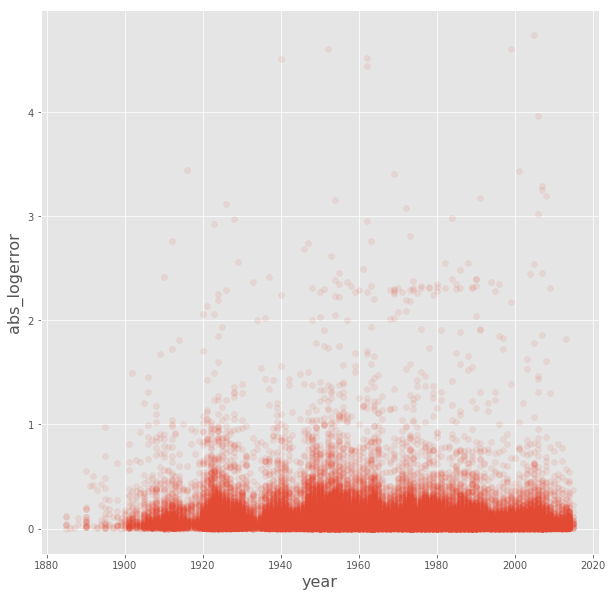

In [45]:
plt.figure(figsize = (10, 10))
plt.scatter(train_df.yearbuilt, train_df.abs_logerror, alpha=0.1)
plt.xlabel('year', fontsize = 16)
plt.ylabel('abs_logerror', fontsize = 16)
plt.show()

### similar cross-plot with seaborn

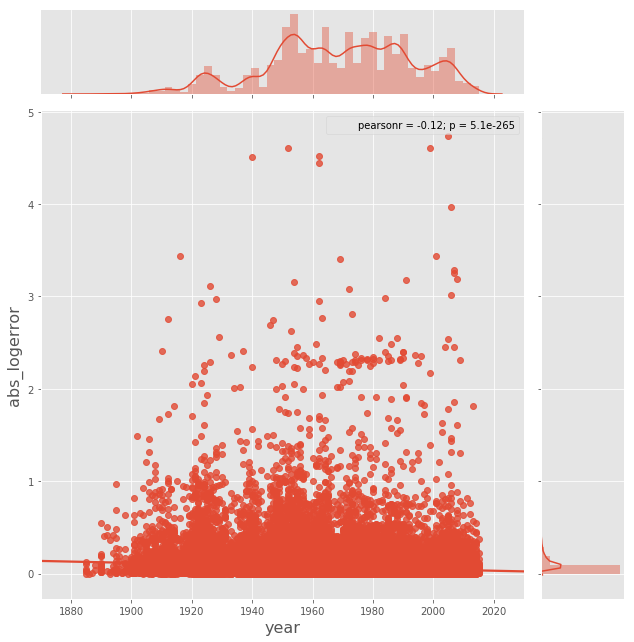

In [46]:
# plt.figure(figsize = (16, 6))
sns.jointplot('yearbuilt', 'abs_logerror', train_df.query('yearbuilt==yearbuilt'), 
              size = 9, kind='reg')
plt.xlabel('year', fontsize = 16)
plt.ylabel('abs_logerror', fontsize = 16)
plt.show()

Aggregate abs_logerror regarding built year

In [24]:
train_df_logerrorAggYear = train_df.groupby('yearbuilt').abs_logerror.mean().reset_index()

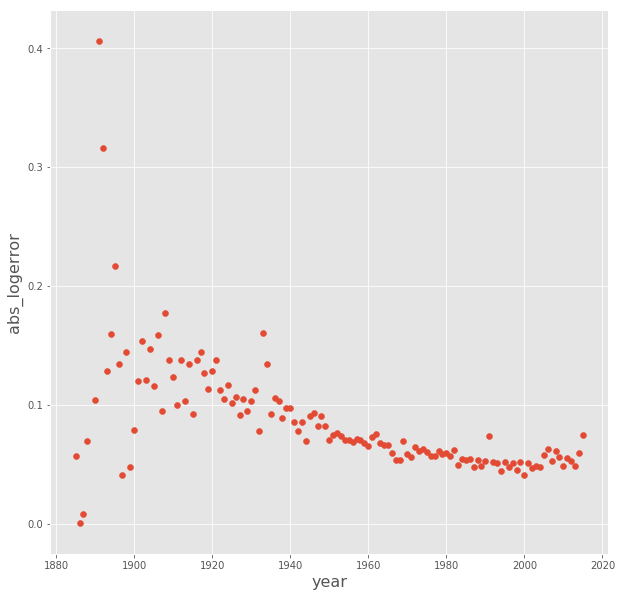

In [47]:
plt.figure(figsize = (10, 10))
plt.scatter(train_df_logerrorAggYear.yearbuilt, train_df_logerrorAggYear.abs_logerror)
plt.xlabel('year', fontsize = 16)
plt.ylabel('abs_logerror', fontsize = 16)
plt.show()

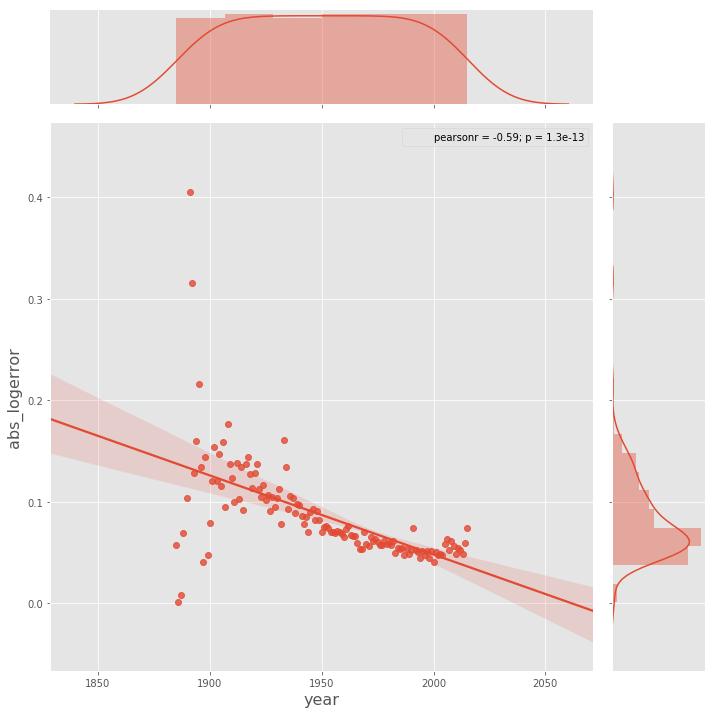

In [48]:
sns.jointplot('yearbuilt', 'abs_logerror', 
             train_df_logerrorAggYear, size = 10, kind = 'reg')
plt.xlabel('year', fontsize = 16)
plt.ylabel('abs_logerror', fontsize = 16)
plt.show()

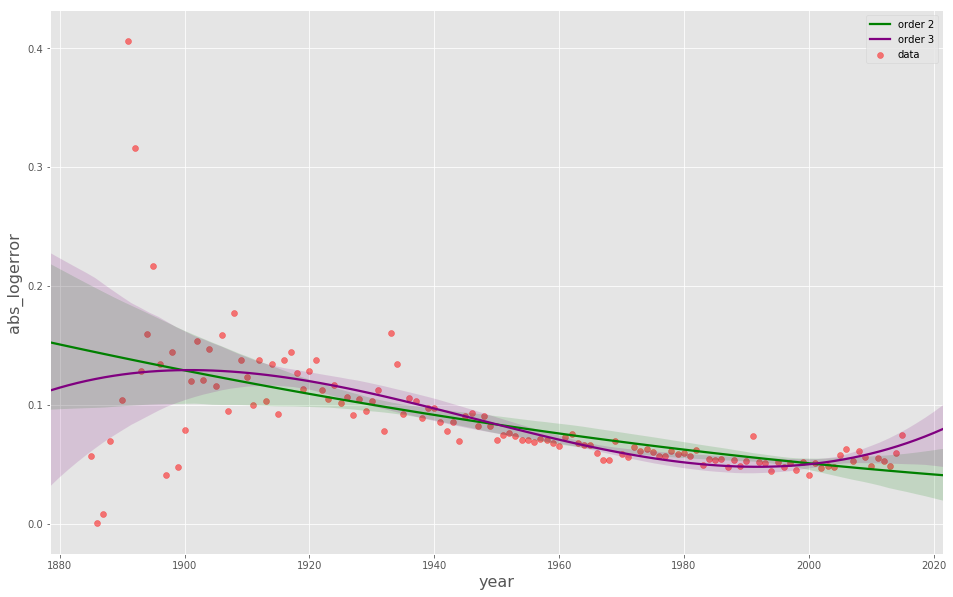

In [51]:
plt.figure(figsize = (16, 10))

plt.scatter(train_df_logerrorAggYear.yearbuilt, train_df_logerrorAggYear.abs_logerror, 
            label='data', color='red', marker='o', alpha=.5)
# sns.regplot(train_df_logerrorAggYear.yearbuilt, train_df_logerrorAggYear.abs_logerror, 
#             scatter=None, color='blue', label='order 1')
sns.regplot(train_df_logerrorAggYear.yearbuilt, train_df_logerrorAggYear.abs_logerror, 
            scatter=None, order=2, color='green', label='order 2')
sns.regplot(train_df_logerrorAggYear.yearbuilt, train_df_logerrorAggYear.abs_logerror, 
            scatter=None, order=3, color='purple', label='order 3')

plt.xlabel('year', fontsize = 16)
plt.ylabel('abs_logerror', fontsize = 16)

plt.legend(loc='upper right')
plt.show()

new houses are easier to predict

parse year and month from transactiondate

In [28]:
train_df_copy = train_df.copy()
train_df_copy['transactiondate'] = pd.to_datetime(train_df_copy['transactiondate'])

In [29]:
train_df_copy['transactionyear'] = train_df_copy['transactiondate'].dt.year
train_df_copy['transactionmonth'] = train_df_copy['transactiondate'].dt.month

In [30]:
train_df_logerrorTransactionyear = train_df_copy.groupby('transactionyear').abs_logerror.mean().reset_index()

In [31]:
train_df_logerrorTransactionyear

,transactionyear,abs_logerror
0,2016,0.068447


In [32]:
train_df_logerrorTransactionmonth = train_df_copy.groupby('transactionmonth').abs_logerror.mean().reset_index()

In [33]:
train_df_logerrorTransactionmonth

,transactionmonth,abs_logerror
0,1,0.072695
1,2,0.077434
2,3,0.072044
3,4,0.069972
4,5,0.066241
5,6,0.066158
6,7,0.065044
7,8,0.066104
8,9,0.067279
9,10,0.064746


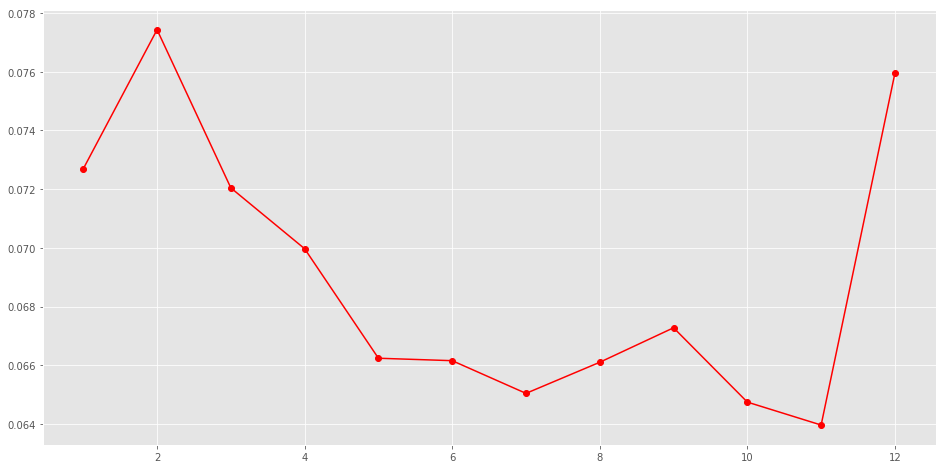

In [34]:
plt.figure(figsize = (16, 8))

plt.plot(train_df_logerrorTransactionmonth.transactionmonth, train_df_logerrorTransactionmonth.abs_logerror, 
         color='red', marker='o')
plt.show()

## Multivariate EDA - lot size vs. tax value

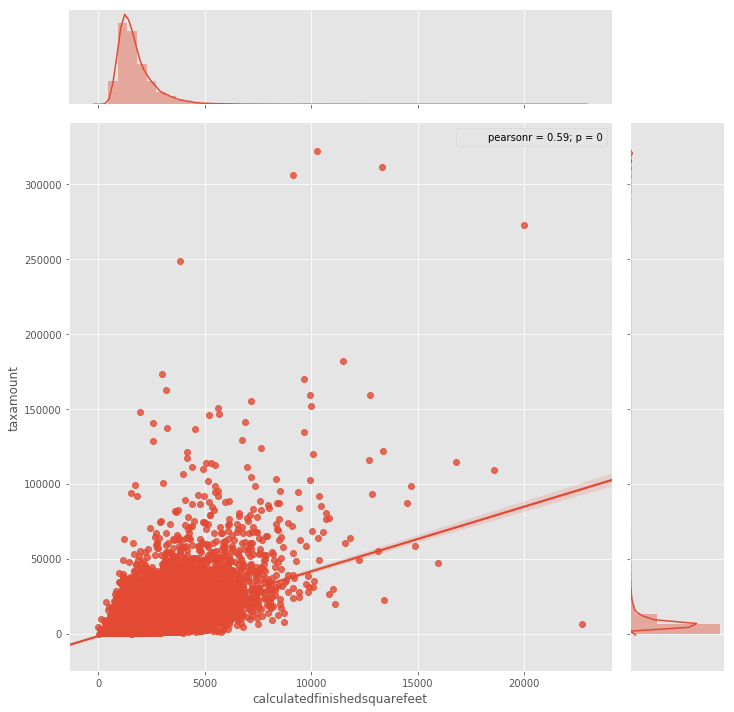

In [35]:
sns.jointplot('calculatedfinishedsquarefeet','taxamount',
              train_df,size=10,kind='reg')

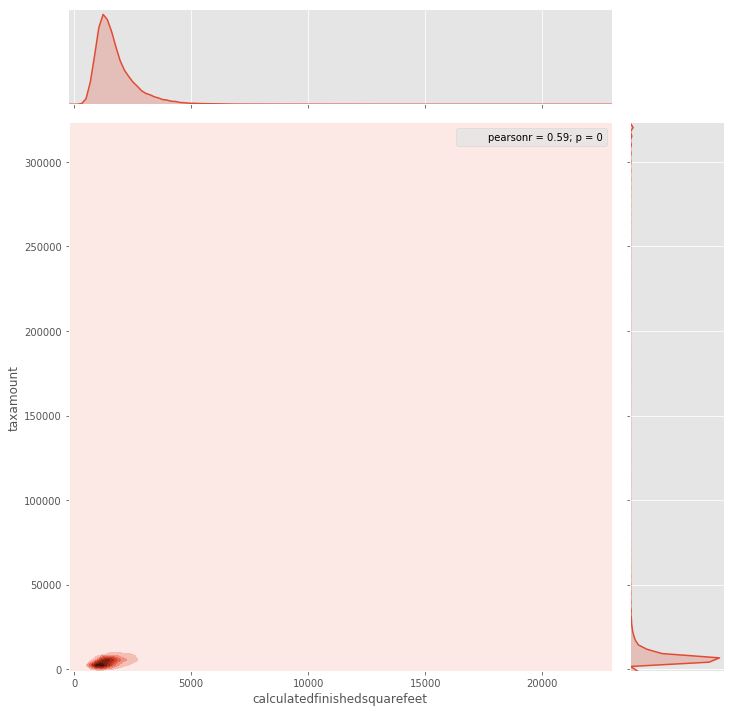

In [36]:
sns.jointplot('calculatedfinishedsquarefeet','taxamount',
              train_df,size=10,kind='kde')
# plt.xlim(0, 10000)
# plt.ylim(0, 10000)

## Multivariate EDA - tax value vs. tax amount

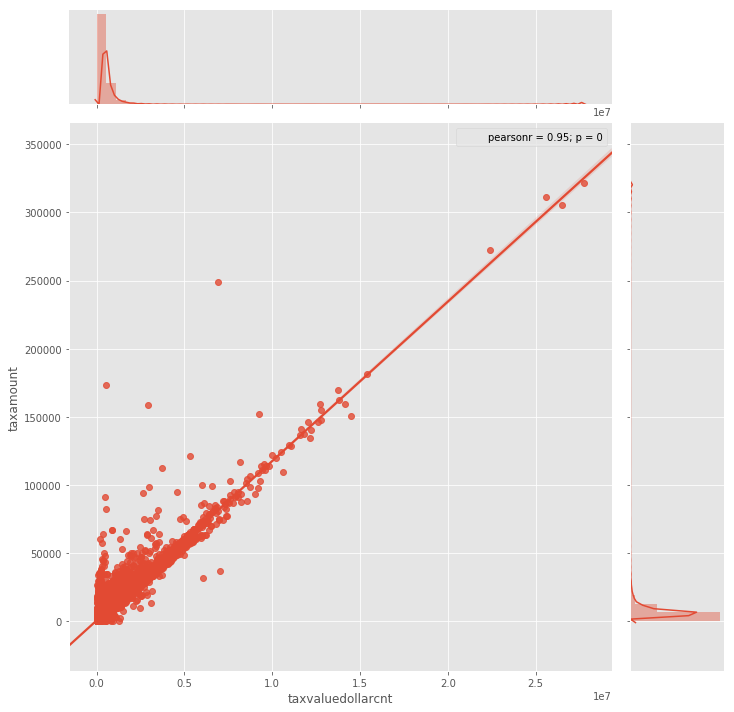

In [37]:
sns.jointplot('taxvaluedollarcnt','taxamount',
              train_df,size=10,kind='reg')

## Multivariate EDA - logerror vs. architecturalstyletypeid

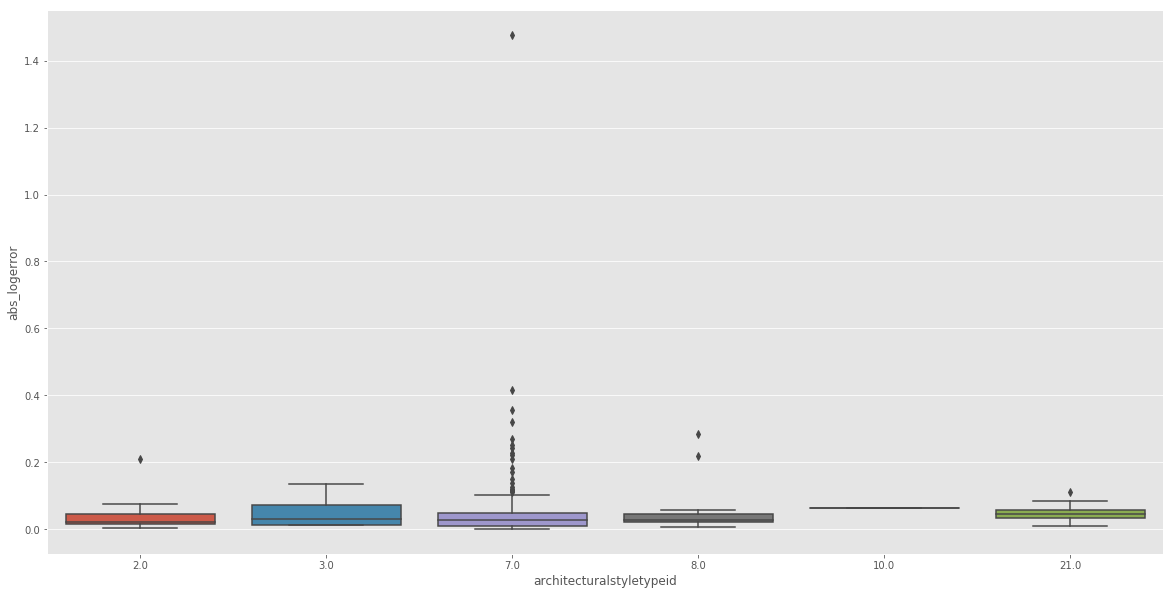

In [38]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=train_df,
            x='architecturalstyletypeid',
            y='abs_logerror')

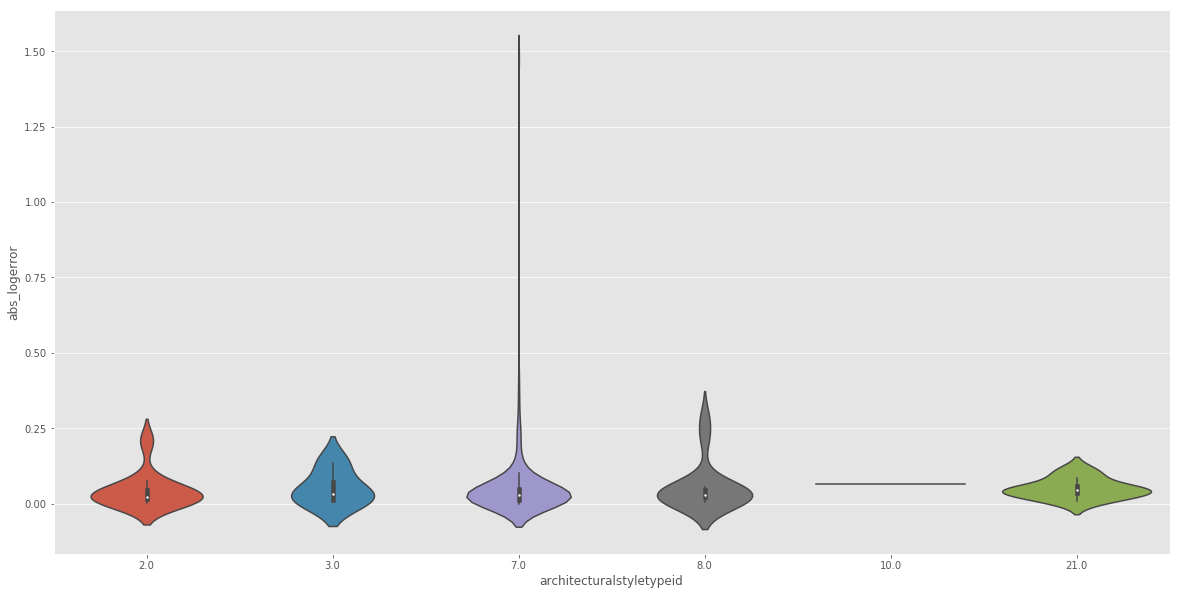

In [39]:
plt.figure(figsize=(20, 10))
sns.violinplot(data=train_df,
            x='architecturalstyletypeid',
            y='abs_logerror')

Zillow model is not ideal for architectural style 7, more time could be spent on that

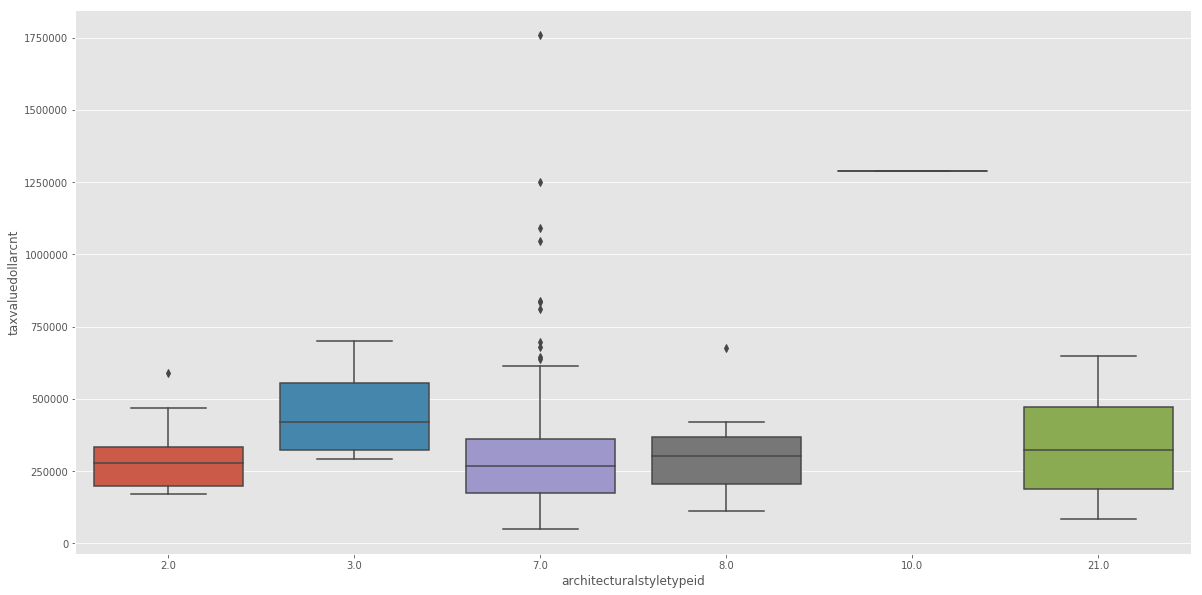

In [40]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=train_df,
            x='architecturalstyletypeid',
            y='taxvaluedollarcnt')

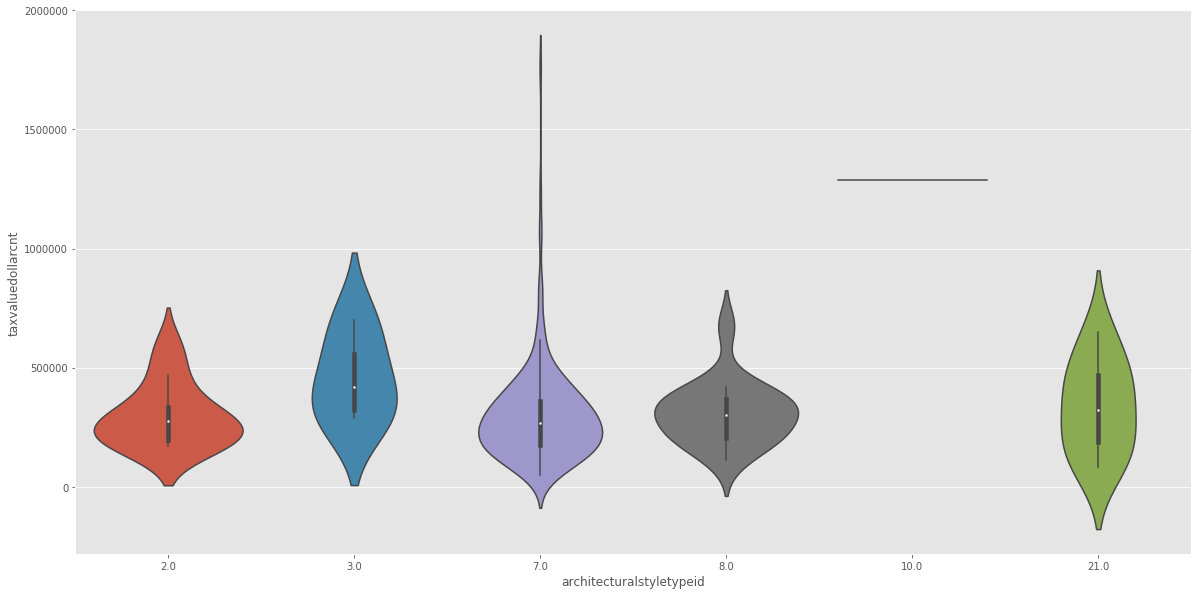

In [41]:
plt.figure(figsize=(20, 10))
sns.violinplot(data=train_df,
            x='architecturalstyletypeid',
            y='taxvaluedollarcnt')

# Find Missing Values

In [56]:
train_df.shape

(90275, 61)

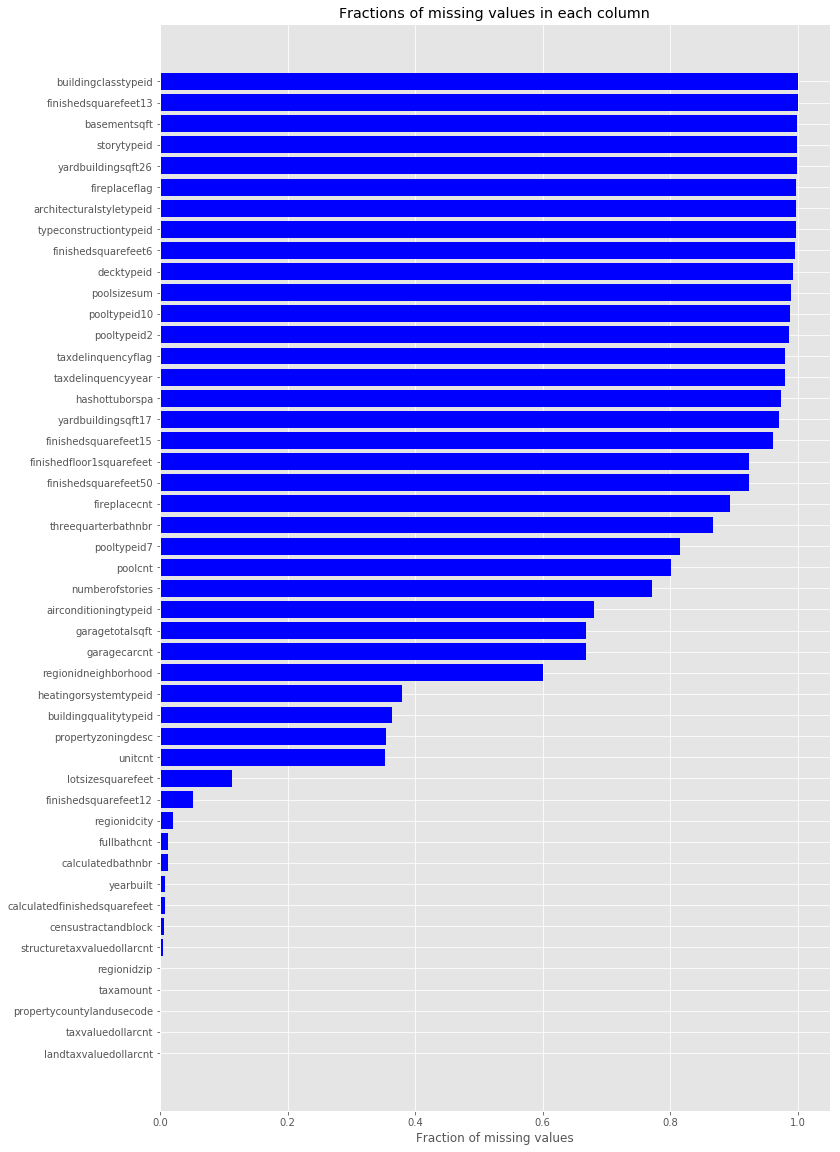

In [60]:
missing_value_df = train_df.isnull().sum(axis = 0).reset_index()
missing_value_df.columns = ['column_name', 'missing_count']
missing_value_df = missing_value_df.loc[missing_value_df['missing_count'] > 0]
missing_value_df = missing_value_df.sort_values(by = 'missing_count')

index = np.arange(missing_value_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,20))
rects = ax.barh(index, missing_value_df.missing_count.values / train_df.shape[0], color='blue')
ax.set_yticks(index)
ax.set_yticklabels(missing_value_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Fraction of missing values")
ax.set_title("Fractions of missing values in each column")
plt.show()

# Data Preprocessing

## Group Variables into different groups

In [68]:
cat_vars = list(train_df.dtypes[data_types=='object'].index)
num_vars = list(train_df.dtypes[data_types=='int64'].index) + list(train_df.dtypes[data_types=='float64'].index)

id_var = 'id'
target_var = 'logerror'
num_vars.remove('parcelid')
num_vars.remove('logerror')
num_vars.remove('abs_logerror')
cat_vars.remove('transactiondate')

dt_vars=['transactiondate']

print("Categorical features:", cat_vars)
print( "Numerical features:", num_vars)
print( "Datetime features:", dt_vars)
print( "ID: {}, target: {}" .format( id_var, target_var))

Categorical features: ['hashottuborspa', 'propertycountylandusecode', 'propertyzoningdesc', 'fireplaceflag', 'taxdelinquencyflag']
Numerical features: ['airconditioningtypeid', 'architecturalstyletypeid', 'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid', 'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid', 'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt', 'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet', 'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'propertylandusetypeid', 'rawcensustractandblock', 'regionidcity', 'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt', 'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid', 'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'yearbuilt', 'num

## Create New Numerical Features

In [69]:
properties['finished_sq_ratio'] = properties[['calculatedfinishedsquarefeet','lotsizesquarefeet']].apply(
    lambda x : x[0]/x[1] if x[1] > 0 else -999999, axis = 1)

properties['taxvalue_per_sq'] = properties[['taxvaluedollarcnt','calculatedfinishedsquarefeet']].apply(
    lambda x : x[0]/x[1] if x[1] > 0 else -999999, axis = 1)

properties['structure_tax_ratio'] = properties[['structuretaxvaluedollarcnt','taxvaluedollarcnt']].apply(
    lambda x : x[0]/x[1] if x[1] > 0 else -999999, axis = 1)

properties['landtax_per_sq'] = properties[['landtaxvaluedollarcnt','lotsizesquarefeet']].apply(
    lambda x : x[0]/x[1] if x[1] > 0 else -999999, axis = 1)

properties['assessmentyear_to_builtyear']= properties[['assessmentyear','yearbuilt']].apply(
    lambda x : x[0]-x[1] if x[0] > 0 and x[1] > 0 else -999999, axis = 1)


num_to_num_vars = ['finished_sq_ratio','taxvalue_per_sq','structure_tax_ratio',
                   'landtax_per_sq','assessmentyear_to_builtyear']

### update train_df with new features

In [70]:
train_df = pd.merge(train_df, properties[num_to_num_vars + ['parcelid']], how='left', on='parcelid')

# Categorical features: Label Encoding


## Label Encoding only works for tree models, will need One Hot Encoding

In [72]:
LE = preprocessing.LabelEncoder()

LE_vars=[]
LE_map=dict()
for cat_var in cat_vars:
    print ("Label Encoding {}".format(cat_var))
    LE_var = cat_var + '_le'
    properties[LE_var] = LE.fit_transform(properties[cat_var].astype(str).fillna('none'))
    LE_vars.append(LE_var)
    LE_map[cat_var]=LE.classes_
    
print ("Label-encoded feaures: {}".format(LE_vars))

Label Encoding hashottuborspa
Label Encoding propertycountylandusecode
Label Encoding propertyzoningdesc
Label Encoding fireplaceflag
Label Encoding taxdelinquencyflag
Label-encoded feaures: ['hashottuborspa_le', 'propertycountylandusecode_le', 'propertyzoningdesc_le', 'fireplaceflag_le', 'taxdelinquencyflag_le']


# Categorical features: One Hot Encoding

In [73]:
OHE = preprocessing.OneHotEncoder(sparse=True)
start=time.time()
OHE.fit(properties[LE_vars])
OHE_sparse=OHE.transform(properties[LE_vars])
                                   
print ('One-hot-encoding finished in {} seconds'.format(time.time()-start))

OHE_vars = [var[:-3] + '_' + str(level).replace(' ','_')\
                for var in cat_vars for level in LE_map[var] ]

print ("OHE_sparse size :" ,OHE_sparse.shape)
print ("One-hot encoded catgorical feature samples : {}".format(OHE_vars[:100]))

One-hot-encoding finished in 10.540542602539062 seconds
OHE_sparse size : (2985217, 5886)
One-hot encoded catgorical feature samples : ['hashottubor_True', 'hashottubor_nan', 'propertycountylandusec_0', 'propertycountylandusec_010', 'propertycountylandusec_0100', 'propertycountylandusec_0101', 'propertycountylandusec_0102', 'propertycountylandusec_0103', 'propertycountylandusec_0104', 'propertycountylandusec_0105', 'propertycountylandusec_0106', 'propertycountylandusec_0108', 'propertycountylandusec_0109', 'propertycountylandusec_010C', 'propertycountylandusec_010D', 'propertycountylandusec_010E', 'propertycountylandusec_010F', 'propertycountylandusec_010G', 'propertycountylandusec_010H', 'propertycountylandusec_010L', 'propertycountylandusec_010M', 'propertycountylandusec_010T', 'propertycountylandusec_010V', 'propertycountylandusec_010X', 'propertycountylandusec_010Y', 'propertycountylandusec_0110', 'propertycountylandusec_0111', 'propertycountylandusec_0113', 'propertycountylandusec

# Modeling

In [74]:
# start with minimum features
train_df = train.merge(properties, how='left', on='parcelid')

In [75]:
full_vars = num_vars + LE_vars 
train_x = train_df[full_vars]
train_y = train_df['logerror'].values.astype(np.float32)

test_x = properties[full_vars]

# xgboost params
xgb_params = {
    'eta': 0.05,
    'max_depth': 4,
    'objective': 'reg:linear',
    'eval_metric': 'mae',
    'silent': 1,
    'seed': 1234
}

dtrain = xgb.DMatrix(train_x, train_y)
dtest = xgb.DMatrix(test_x)

# cross-validation
cv_result = xgb.cv(xgb_params, 
                   dtrain, 
                   nfold=5,
                   num_boost_round=10000,
                   early_stopping_rounds=50,
                   verbose_eval=10, 
                   show_stdv=False,
                   seed = 1234
                  )

## best score and best round
best_iteration = len(cv_result)
best_score = cv_result['test-mae-mean'].min()
print("Best score {}, best iteration {}".format(best_score,best_iteration))


[0]	train-mae:0.472892	test-mae:0.472903
[10]	train-mae:0.291914	test-mae:0.292041
[20]	train-mae:0.18733	test-mae:0.187564
[30]	train-mae:0.128449	test-mae:0.128782
[40]	train-mae:0.0967488	test-mae:0.0971616
[50]	train-mae:0.0808742	test-mae:0.081373
[60]	train-mae:0.073532	test-mae:0.074115
[70]	train-mae:0.0702526	test-mae:0.0709188
[80]	train-mae:0.0687922	test-mae:0.0695242
[90]	train-mae:0.0680946	test-mae:0.0688938
[100]	train-mae:0.0677446	test-mae:0.068603
[110]	train-mae:0.0675466	test-mae:0.0684688
[120]	train-mae:0.0674242	test-mae:0.0684076
[130]	train-mae:0.0673406	test-mae:0.0683862
[140]	train-mae:0.067275	test-mae:0.0683742
[150]	train-mae:0.0672244	test-mae:0.068377
[160]	train-mae:0.0671776	test-mae:0.0683938
[170]	train-mae:0.067138	test-mae:0.0684228
[180]	train-mae:0.0671006	test-mae:0.0684396
[190]	train-mae:0.067062	test-mae:0.068456
Best score 0.0683696, best iteration 145


In [76]:
model = xgb.train(dict(xgb_params, silent = 1), dtrain, num_boost_round = best_iteration)
pred = model.predict(dtest)
y_pred=[]

for i,predict in enumerate(pred):
    y_pred.append(str(round(predict,4)))
y_pred=np.array(y_pred)

output = pd.DataFrame({'ParcelId': properties['parcelid'].astype(np.int32),
        '201610': y_pred, '201611': y_pred, '201612': y_pred,
        '201710': y_pred, '201711': y_pred, '201712': y_pred})
# set col 'ParceID' to first col
cols = output.columns.tolist()
cols = cols[-1:] + cols[:-1]
output = output[cols]
from datetime import datetime
output.to_csv('outputs/sub{}.csv'.format(datetime.now().strftime('%Y%m%d_%H%M%S')), index = False)

print ("Finished")

Finished


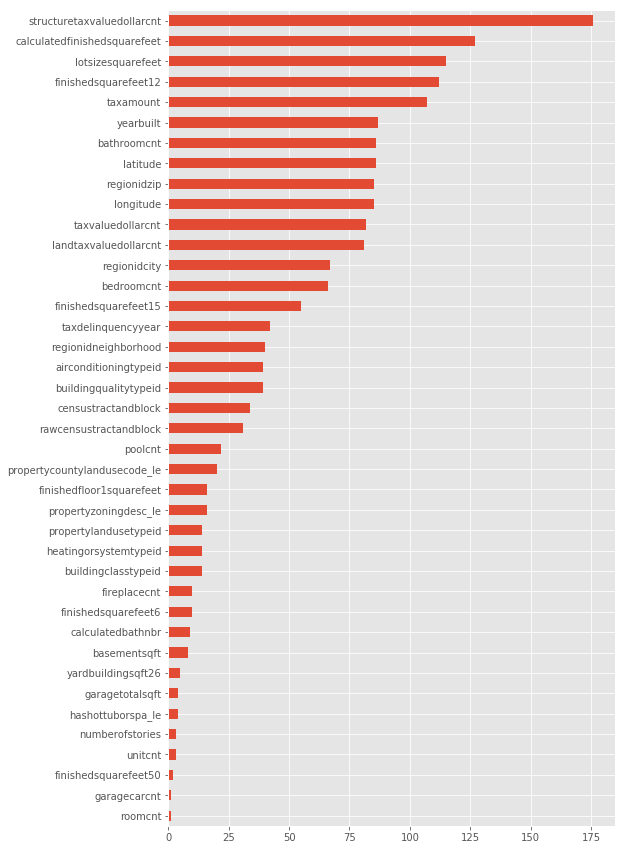

In [81]:
feature_imporantce = pd.Series(model.get_fscore()).sort_values(ascending = True)
feature_imporantce.plot.barh(x='feature_name',figsize=(8,15))

In [82]:
full_vars = num_vars + LE_vars + num_to_num_vars
train_x = train_df[full_vars]
train_y = train_df['logerror'].values.astype(np.float32)

test_x = properties[full_vars]

# xgboost params
xgb_params = {
    'eta': 0.05,
    'max_depth': 4,
    'objective': 'reg:linear',
    'eval_metric': 'mae',
    'silent': 1,
    'seed': 1234
}

dtrain = xgb.DMatrix(train_x, train_y)
dtest = xgb.DMatrix(test_x)

# cross-validation
cv_result = xgb.cv(xgb_params, 
                   dtrain, 
                   nfold=5,
                   num_boost_round=10000,
                   early_stopping_rounds=50,
                   verbose_eval=10, 
                   show_stdv=False,
                   seed = 1234
                  )

## best score and best round
best_iteration = len(cv_result)
best_score = cv_result['test-mae-mean'].min()
print("Best score {}, best iteration {}".format(best_score,best_iteration))

[0]	train-mae:0.472892	test-mae:0.472903
[10]	train-mae:0.291909	test-mae:0.292048
[20]	train-mae:0.187326	test-mae:0.187571
[30]	train-mae:0.128443	test-mae:0.128781
[40]	train-mae:0.0967506	test-mae:0.09718
[50]	train-mae:0.0808814	test-mae:0.0813918
[60]	train-mae:0.0735342	test-mae:0.0741218
[70]	train-mae:0.0702658	test-mae:0.070941
[80]	train-mae:0.068802	test-mae:0.069555
[90]	train-mae:0.0681026	test-mae:0.0689354
[100]	train-mae:0.0677424	test-mae:0.0686488
[110]	train-mae:0.0675388	test-mae:0.068518
[120]	train-mae:0.0674132	test-mae:0.068459
[130]	train-mae:0.0673204	test-mae:0.0684322
[140]	train-mae:0.067254	test-mae:0.068427
[150]	train-mae:0.0671966	test-mae:0.0684284
[160]	train-mae:0.0671468	test-mae:0.0684358
[170]	train-mae:0.0670958	test-mae:0.0684464
[180]	train-mae:0.067057	test-mae:0.0684602
[190]	train-mae:0.0670136	test-mae:0.0684768
Best score 0.0684202, best iteration 146


In [83]:
model = xgb.train(dict(xgb_params, silent = 1), dtrain, num_boost_round = best_iteration)
pred = model.predict(dtest)
y_pred=[]

for i,predict in enumerate(pred):
    y_pred.append(str(round(predict,4)))
y_pred=np.array(y_pred)

output = pd.DataFrame({'ParcelId': properties['parcelid'].astype(np.int32),
        '201610': y_pred, '201611': y_pred, '201612': y_pred,
        '201710': y_pred, '201711': y_pred, '201712': y_pred})
# set col 'ParceID' to first col
cols = output.columns.tolist()
cols = cols[-1:] + cols[:-1]
output = output[cols]
from datetime import datetime
output.to_csv('outputs/sub_with_engineered_features{}.csv'.format(datetime.now().strftime('%Y%m%d_%H%M%S')), index=False)

print ("Finished")

Finished


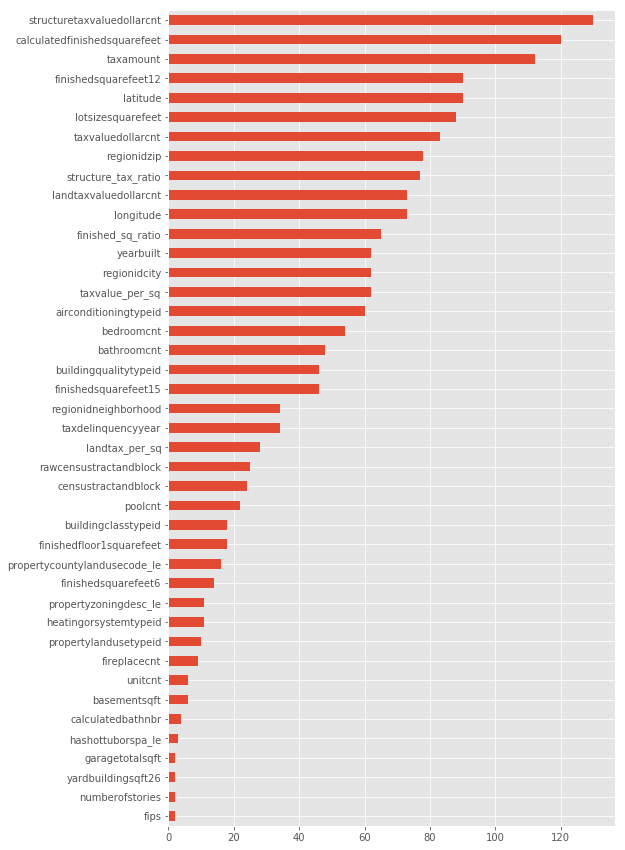

In [84]:
feature_imporantce = pd.Series(model.get_fscore()).sort_values(ascending = True)
feature_imporantce.plot.barh(x='feature_name',figsize=(8,15))